In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("..")

In [4]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
from datetime import timedelta
from glob import glob
from ast import literal_eval
import arviz as az
import pickle

array([[<AxesSubplot: title={'center': 'sd_uc'}>,
        <AxesSubplot: title={'center': 'sd_uc'}>],
       [<AxesSubplot: title={'center': 'sd_brain'}>,
        <AxesSubplot: title={'center': 'sd_brain'}>],
       [<AxesSubplot: title={'center': 'sd_obs_brain'}>,
        <AxesSubplot: title={'center': 'sd_obs_brain'}>]], dtype=object)

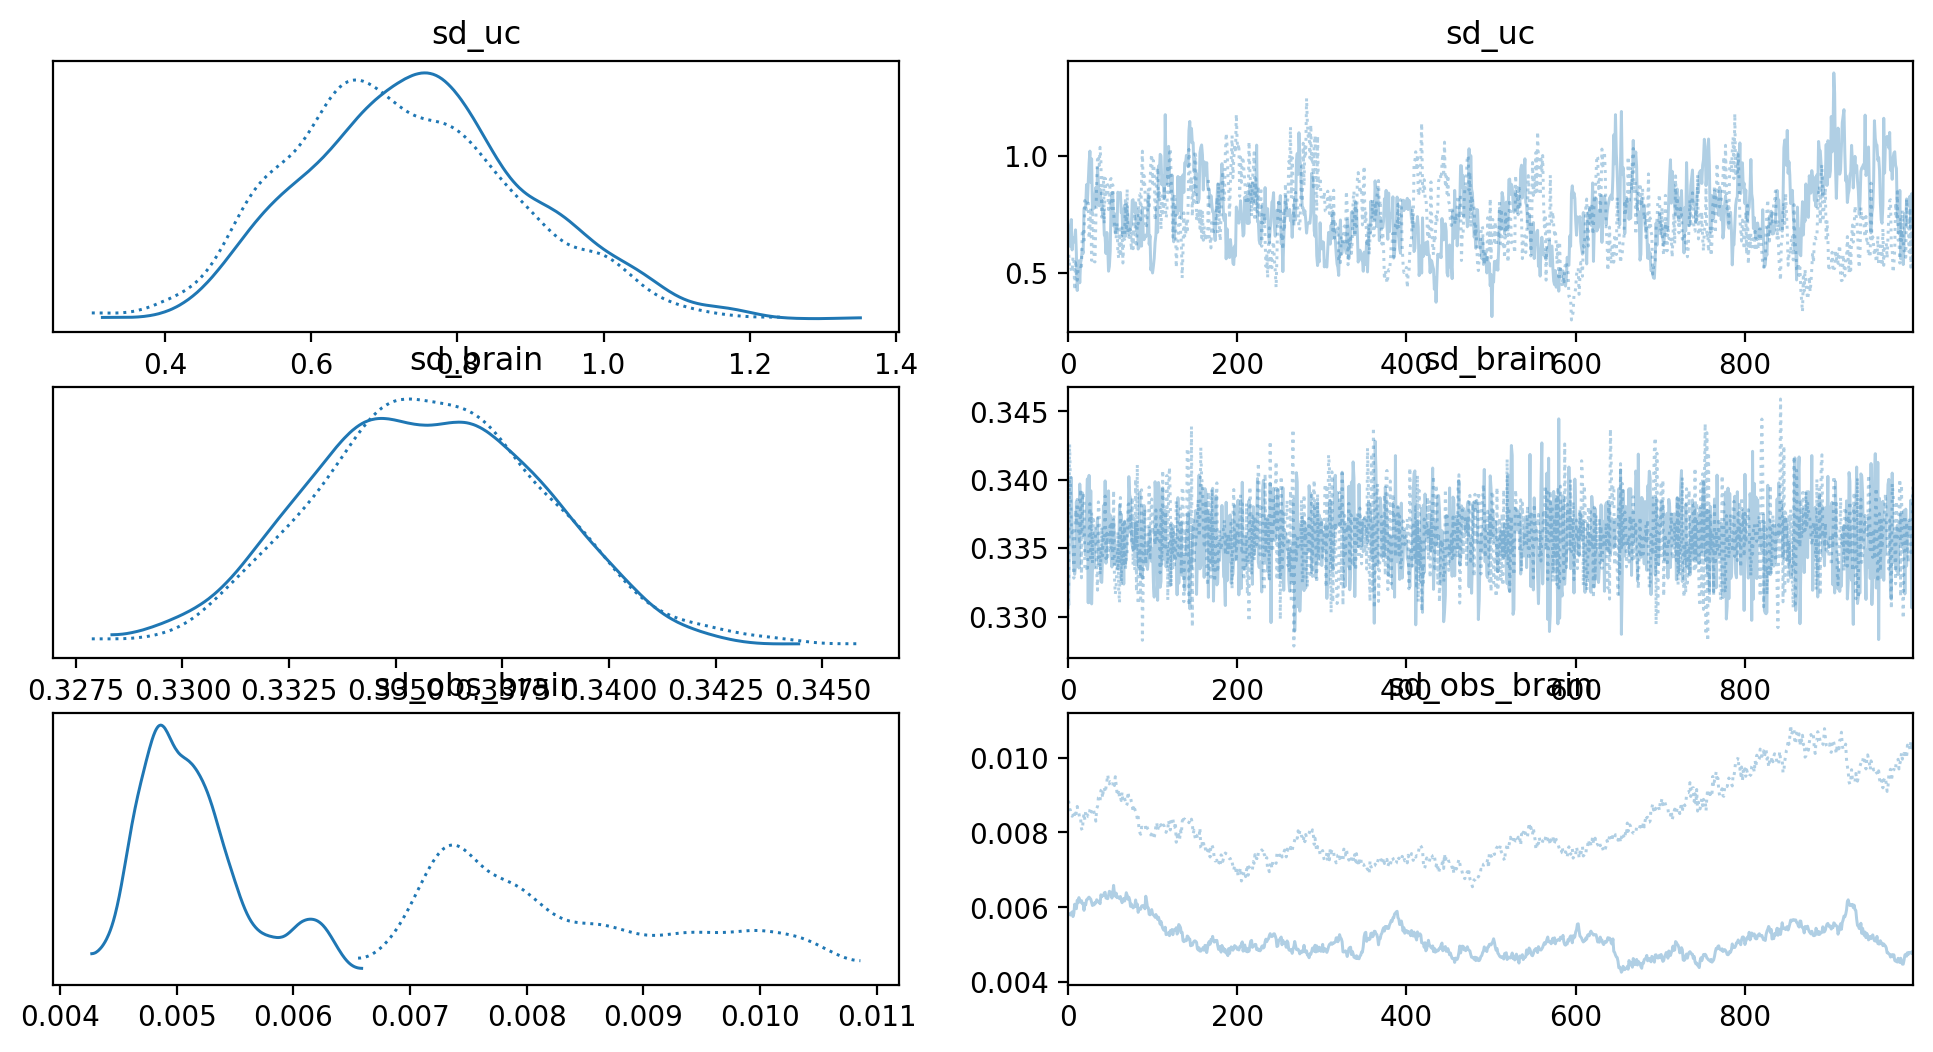

In [19]:
with open("/Users/paulosoares/data/IJCAI_2023/ping_pong/inference/2023.01.13--17.53.21/inference_data.pkl", "rb") as f:
    idata = pickle.load(f)

az.plot_trace(idata[0], var_names=["sd_uc", "sd_brain", "sd_obs_brain"])

In [236]:
brain_df = pd.read_csv("/Users/paulosoares/data/IJCAI_2023/ping_pong/parsed/ping_pong_cooperative_0/brain_signals.csv", index_col=0)
brain_df.head()

,experiment_id,subject,frequency_hz,avg_hb_total,no_measurement,measurements_per_window,initial_timestamp
0,exp_2022_10_14_10,lion,10.0,"[[0.10057206378902639, 0.08735261779935219, 0....",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-10-14T11:54:31.528963
1,exp_2022_10_14_10,tiger,10.0,"[[-0.4120281705397918, -0.41190138593285447, -...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-10-14T11:54:31.528963
2,exp_2022_10_14_10,leopard,10.0,"[[-1.1096170159689418, -1.091974349281331, -1....",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",2022-10-14T11:54:31.528963
3,exp_2022_10_31_10,lion,10.0,"[[0.0010800613647937, 0.0010987831003841, 0.00...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-10-31T11:54:39.554771
4,exp_2022_10_31_10,tiger,10.0,"[[-0.3763467712764304, -0.3752134033648055, -0...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-10-31T11:54:39.554771


In [237]:
body_df = pd.read_csv("/Users/paulosoares/data/IJCAI_2023/ping_pong/parsed/ping_pong_cooperative_0/body_movements.csv", index_col=0)
body_df.head()

,experiment_id,subject,frequency_hz,total_energy,no_measurement,measurements_per_window,initial_timestamp
0,exp_2022_11_10_10,lion,10.0,"[[21340.352811199977, 21868.435962499978, 2113...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-10T18:52:31.980512+00:00
1,exp_2022_11_10_10,tiger,10.0,"[[21584.138257599974, 21742.571760149982, 2055...",9,"[1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2022-11-10T18:52:31.980512+00:00
2,exp_2022_11_10_10,leopard,10.0,"[[21478.510052599962, 21636.94353180001, 20448...",1,"[1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2022-11-10T18:52:31.980512+00:00
3,exp_2022_11_22_10,lion,10.0,"[[20894.690062799993, 21421.466895500023, 2068...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-22T18:57:43.245798+00:00
4,exp_2022_11_22_10,tiger,10.0,"[[21812.546734599993, 20927.862571000027, 2051...",1,"[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, ...",2022-11-22T18:57:43.245798+00:00


In [273]:
data_df = brain_df.merge(body_df,  on=["experiment_id", "subject"], suffixes=("_brain", "_body"))
data_df.head()

,experiment_id,subject,frequency_hz_brain,avg_hb_total,no_measurement_brain,measurements_per_window_brain,initial_timestamp_brain,frequency_hz_body,total_energy,no_measurement_body,measurements_per_window_body,initial_timestamp_body
0,exp_2022_11_10_10,lion,10.0,"[[0.9966642800388275, 1.0025415415212182, 0.0,...",156,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-10T11:52:31.980512,10.0,"[[21340.352811199977, 21868.435962499978, 2113...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-10T18:52:31.980512+00:00
1,exp_2022_11_10_10,tiger,10.0,"[[-1.7758864961314698, -1.717796240526565, -1....",156,"[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-10T11:52:31.980512,10.0,"[[21584.138257599974, 21742.571760149982, 2055...",9,"[1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2022-11-10T18:52:31.980512+00:00
2,exp_2022_11_10_10,leopard,10.0,"[[1.2412798152359437, 1.2121530383571308, 1.18...",156,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",2022-11-10T11:52:31.980512,10.0,"[[21478.510052599962, 21636.94353180001, 20448...",1,"[1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2022-11-10T18:52:31.980512+00:00
3,exp_2022_11_22_10,lion,10.0,"[[0.1307634203391869, 0.1245456276577844, 0.11...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-22T11:57:43.245798,10.0,"[[20894.690062799993, 21421.466895500023, 2068...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-22T18:57:43.245798+00:00
4,exp_2022_11_22_10,tiger,10.0,"[[0.3509679929885433, 0.3293496156657033, 0.30...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-11-22T11:57:43.245798,10.0,"[[21812.546734599993, 20927.862571000027, 2051...",1,"[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, ...",2022-11-22T18:57:43.245798+00:00


In [331]:
def vec_linspace(start, stop, N):
    steps = (1.0 / N) * (stop - start)
    return steps[:,None]*np.arange(N) + start[:,None]

def fill_gaps(data, missing_mask):
    num_time_steps = data.shape[1]
    
    next_index_with_value = np.zeros(num_time_steps)
    for t in range(num_time_steps-1, -1, -1):
        next_index_with_value[t] = t if missing_mask[t] == 1 or t == num_time_steps - 1 else next_index_with_value[t + 1]
    
    while t < num_time_steps:
        if missing_mask[t] == 0:
            next_t = int(next_index_with_value[t])
            
            if t == 0:
                # Repeat the values
                if next_t == 1:
                    data[:, 0:next_t] = data[:, next_t]
                else:
                    data[:, 0:next_t] = data[:, next_t][:, None]
            elif t == num_time_steps - 1:
                # Repeat the values
                data[:, t] = data[:, t-1]
            else:
                gap_size = next_t - t            
                data[:, t:next_t] = vec_linspace(data[:, t-1], data[:, next_t], gap_size + 1)[:, 1:]
            
            t = next_t + 1
        else:
            t += 1
    
    return data

def to_coordination_timescale(data, num_time_steps, data_frequency):
    coordination_frequency = (num_time_steps / data.shape[1]) * data_frequency
    
    assert coordination_frequency >= data_frequency
    
    values = np.zeros((data.shape[0], T))
    mask = np.zeros(T)
    for t in range(num_time_steps):
        if (t * data_frequency) % coordination_frequency == 0:
            # Match between coordination time scale and data time scale
            t_data = int(t * data_frequency / coordination_frequency)
            
            values[:, t] = data[:, t_data]
            mask[t] = 1
    
    return values, mask

In [351]:
T = 2400

all_brain_signals = []
all_brain_masks = []
all_body_movements = []
all_body_masks = []
for experiment_id in data_df["experiment_id"].unique():    
    brain_signals_per_subject = []
    brain_masks = None
    
    body_movements_per_subject = []
    body_masks = None
    
    for subject in ["lion", "tiger", "leopard"]:
        row = data_df[(data_df["experiment_id"] == experiment_id) & (data_df["subject"] == subject)] 
            
        # Brain signal 
        brain_signals = np.array(literal_eval(row["avg_hb_total"].values[0]))
        num_measurements = np.array(literal_eval(row["measurements_per_window_brain"].values[0]))
        missing_data = np.where(num_measurements == 0, 0, 1)
        brain_signals = fill_gaps(brain_signals, missing_data)
        brain_signals, brain_masks = to_coordination_timescale(brain_signals, T, row["frequency_hz_brain"].values[0])
        brain_signals_per_subject.append(brain_signals)
        
        # Body movements
        body_movements = np.array(literal_eval(row["total_energy"].values[0]))
        num_measurements = np.array(literal_eval(row["measurements_per_window_body"].values[0]))
        missing_data = np.where(num_measurements == 0, 0, 1)
        body_movements = fill_gaps(body_movements, missing_data)
        body_movements, body_masks = to_coordination_timescale(body_movements, T, row["frequency_hz_body"].values[0])
        body_movements_per_subject.append(body_movements)
    
    all_brain_signals.append(brain_signals_per_subject)
    all_brain_masks.append(brain_masks)
    
    all_body_movements.append(body_movements_per_subject)
    all_body_masks.append(body_masks)

brain_signals = np.array(all_brain_signals)
brain_masks = np.array(all_brain_masks)

body_movements = np.array(all_body_movements)
body_masks = np.array(all_body_masks)


In [352]:
brain_signals.shape



(6, 3, 20, 2400)

In [353]:
brain_masks.shape

(6, 2400)

In [354]:
body_movements.shape

(6, 3, 1, 2400)

In [307]:
def vec_linspace(start, stop, N):
    steps = (1.0 / N) * (stop - start)
    return steps[:,None]*np.arange(N) + start[:,None]

a = np.random.rand(5)
b = np.random.rand(5)

v = vec_linspace(a, b, 3)





In [308]:
v[:, 2:3]

array([[0.36476208],
       [0.41664444],
       [0.78267152],
       [0.325235  ],
       [0.19119224]])

In [309]:
b

array([0.23974009, 0.62059575, 0.94973092, 0.18802087, 0.28332192])

In [338]:
data = np.random.rand(3, 13)
print(data)
mask = np.array([1,1,0,0,1,0,1,1,1,0,0,1,0])
print(fill_gaps(data, mask))

[[0.7962696  0.67038204 0.67139423 0.02192718 0.50692514 0.61389962
  0.88537983 0.86549845 0.64322466 0.7015939  0.9225993  0.28869426
  0.21127399]
 [0.14140385 0.32300521 0.66008305 0.85720112 0.10823034 0.2450789
  0.36394327 0.44001292 0.42579867 0.27512578 0.64066285 0.84365688
  0.49792747]
 [0.85061049 0.59995661 0.90373827 0.6987345  0.12969791 0.90466522
  0.0129737  0.66277548 0.92963164 0.53249599 0.43678005 0.92610001
  0.29509061]]
[[0.7962696  0.67038204 0.6158964  0.56141077 0.50692514 0.69615249
  0.88537983 0.86549845 0.64322466 0.52504786 0.40687106 0.28869426
  0.28869426]
 [0.14140385 0.32300521 0.25141358 0.17982196 0.10823034 0.2360868
  0.36394327 0.44001292 0.42579867 0.56508474 0.70437081 0.84365688
  0.84365688]
 [0.85061049 0.59995661 0.44320371 0.28645081 0.12969791 0.07133581
  0.0129737  0.66277548 0.92963164 0.92845443 0.92727722 0.92610001
  0.92610001]]


In [106]:
nirs_df.sort_values(by=["human_readable_time"]).iloc[0]["human_readable_time"]

Timestamp('2022-10-14 11:24:31.046587687')

In [17]:
from copy import deepcopy

import arviz as az
import matplotlib.pyplot as plt

from coordination.model.brain_body_model import BrainBodyModel
from coordination.model.utils.brain_body_model import BrainBodyDataset
from coordination.common.timing import ScopeTiming

In [18]:
# Parameters
TIME_STEPS = 50
NUM_SERIES = 5
NUM_CHANNELS = 2
SEED = 0

In [19]:
model = BrainBodyModel(0.1, NUM_CHANNELS, 3)
model.parameters.sd_uc = 0.1
model.parameters.sd_brain = 1
model.parameters.sd_body = 1
model.parameters.sd_obs_brain = 1
model.parameters.sd_obs_body = 1

full_samples = model.sample(NUM_SERIES, TIME_STEPS, SEED)

In [20]:
partial_samples = deepcopy(full_samples)
partial_samples.unbounded_coordination = None
partial_samples.coordination = None
partial_samples.latent_brain = None
partial_samples.latent_body = None
evidence = BrainBodyDataset.from_samples(partial_samples)

In [25]:
%%time
model.parameters.reset()
model.prepare_for_fitting(evidence)

CPU times: user 19.5 s, sys: 662 ms, total: 20.2 s
Wall time: 20.2 s


In [ ]:
%%time
trace = model.fit(evidence, 1000, burn_in=1000, num_chains=2, seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [latent_body_4, latent_brain_4, coordination_4, unbounded_coordination_4, latent_body_3, latent_brain_3, coordination_3, unbounded_coordination_3, latent_body_2, latent_brain_2, coordination_2, unbounded_coordination_2, latent_body_1, latent_brain_1, coordination_1, unbounded_coordination_1, latent_body_0, latent_brain_0, coordination_0, unbounded_coordination_0, sd_obs_body, sd_obs_brain, sd_body, sd_brain, sd_uc]
/Users/paulosoares/code/tomcat-coordination/notebooks/../.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/paulosoares/code/tomcat-coordination/notebooks/../.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.

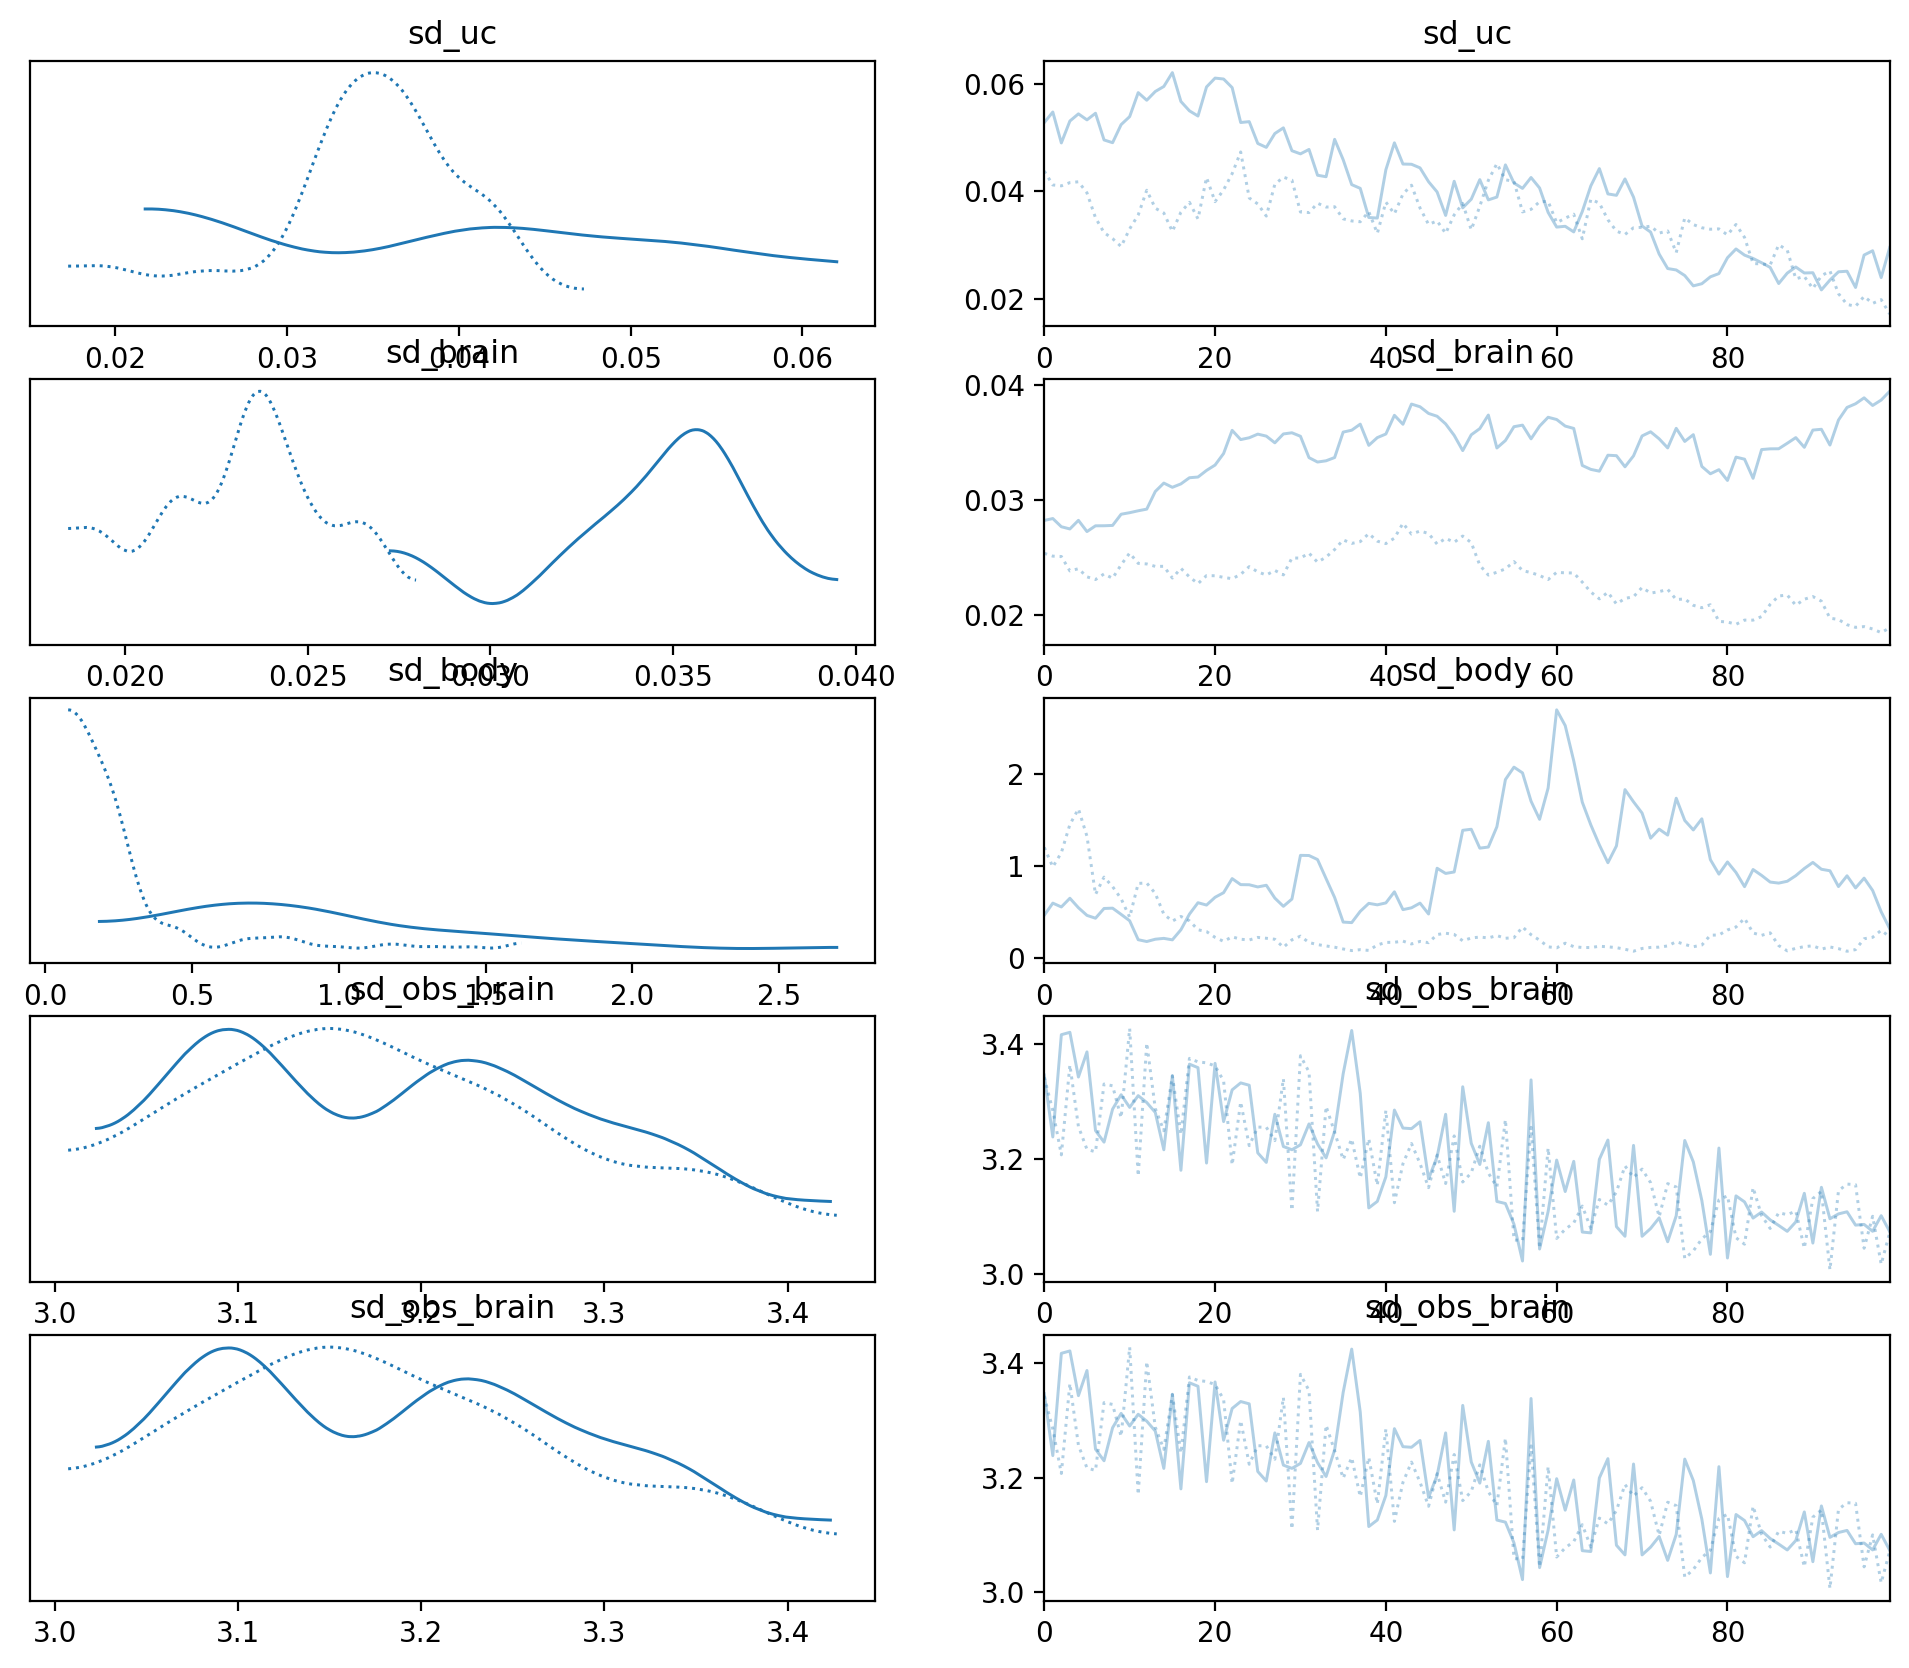

In [28]:
with model._ctx:
    az.plot_trace(trace, var_names=[
        "sd_uc",
        "sd_brain",
        "sd_body",
        "sd_obs_brain",
        "sd_obs_brain"
    ])
    plt.show()

In [ ]:
%%time
model.prepare_for_prediction(evidence)

In [ ]:
summaries = model.predict(evidence, 100, 100, 2, 0)